In [51]:
from peak_warming_calculator import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
plt.rc('font', family='serif')

In [52]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
from numpy import genfromtxt

In [53]:
import time

In [54]:
from varying_g_peak_warming_calculator import *

### MAC curve variables:
- P_50
- s
- P_100

### Economic variables:
- D0
- gamma
- alpha (discount factor)
- g (consumption growth rate)

## Sampling s/r

In [5]:
# Define the model inputs
problem_3 = {
'num_vars': 3,
'names': ['P_50/P_100', 's/r', 'P_100'],
'bounds': [[0.3, 0.6],
[1.5, 3],
[200, 400]]
}
# Generate samples
param_values_3 = saltelli.sample(problem_3, 8)

In [6]:
P_100_list = []

for i in range(len(param_values_3)):
    P_100_list.append(param_values_3[i][2])

In [7]:
consumption_growth_array = np.linspace(0.01, 0.035, 6)

In [8]:
def vary_consumption_growth3(consumption_growth):
    Y = np.zeros([param_values_3.shape[0]])
    SCC_forecasted_0 = np.zeros([param_values_3.shape[0]])

#     consumption_growth = 0.020
    consumption_discount = consumption_growth + 0.015

    for i in range(len(param_values_3)):
        if i%8 == 0:
            print(i)
            t = time.localtime()
            current_time = time.strftime("%H:%M:%S", t)
            print(current_time)
        
        P_50 = param_values_3[i][0]*param_values_3[i][2]
        P_100 = param_values_3[i][2]
        r = consumption_discount
#         constraint = param_values_3[i][1]
#         s = r * np.log(constraint)/np.log((P_100 - P0)/(P_50 - P0))
        s = r * param_values_3[i][1]

        Y[i], SCC_forecasted, forecasted_abatement, forecasted_emissions, T_complete = peak_warming_calculator(P_50=P_50, s=s, P_100=P_100, consumption_growth=consumption_growth, consumption_discount=consumption_discount, r=r, return_all_output=True)
        SCC_forecasted_0[i] = SCC_forecasted[0]
        if Y[i] < 1.4:
            print(param_values_3[i][0])
            print(param_values_3[i][1])
            print(consumption_discount)
            print(param_values_3[i][2])
    return Y, SCC_forecasted_0

In [9]:
# test = vary_consumption_growth3(consumption_growth_array[5])

In [10]:
# test

In [11]:
# plt.scatter(P_100_list, test[0], label=np.round(consumption_growth_array[5], 3))

In [12]:
Y_array = []
SCC_0_array = []

for i in range(len(consumption_growth_array)):  # len(consumption_growth_array)
    Y, SCC_0 = vary_consumption_growth3(consumption_growth_array[i])
    Y_array.append(Y)
    SCC_0_array.append(SCC_0)

0
14:12:43


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:233: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


8
14:13:41
16
14:14:47
24
14:15:45
32
14:16:48
40
14:17:48
48
14:18:48
56
14:19:51
0
14:20:51
8
14:21:26
16
14:21:59
24
14:22:27
32
14:22:54
40
14:23:21
48
14:23:44
56
14:24:26
0
14:25:02
8
14:25:33
16
14:26:03
24
14:26:30
32
14:27:01
40
14:27:30
48
14:27:57
56
14:28:29
0
14:29:01
8
14:29:26
16
14:29:54
24
14:30:17
32
14:30:43
40
14:31:08
48
14:31:31
56
14:31:57
0
14:32:22
8
14:32:44
16
14:33:06
24
14:33:26
32
14:33:48
40
14:34:09
48
14:34:30
56
14:34:51
0
14:35:13
8
14:35:30
16
14:35:49
24
14:36:05
32
14:36:23
40
14:36:40
48
14:36:55
56
14:37:14


Text(0, 0.5, 'Peak Warming')

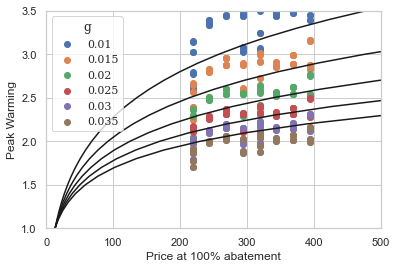

In [13]:
## plot output

for i in range(len(Y_array)):
    plt.scatter(P_100_list, Y_array[i], label=np.round(consumption_growth_array[i], 3))

# plt.legend()
plt.rc('font', family='serif')

## plot curves from Myles' paper

# W0 = 75*10**12  
W0 = 80*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
# note: this corresponds to 0.002 degrees Celsius per GtC
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year

G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))

gamma = 2
# E_0 = 39  # 2014 level of emissions
# percentage_of_emissions = 0.75  # set here the percentage of emisison
# E_bar = percentage_of_emissions*E_0
E_bar = 0.75*40.040508
# T_0 = 0.9  # 1.0136929156818866  # degrees Celsius
T_0 = 1.0136929156818866

T_m = np.arange(1,3.6,0.1)
g_bar = np.arange(0.015, 0.04, 0.005)

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
#     print(gamma, G, T_m)
#     print(np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE))
    plt.plot(A_B*10**(-9), T_m, color="k")  # convert cost into trillions of dollars # , label=g_bar[i]

plt.legend(title="g")
plt.xlim(0, 500)
plt.ylim(1, 3.5)
plt.xlabel("Price at 100% abatement")
plt.ylabel("Peak Warming")

(20, 1000)

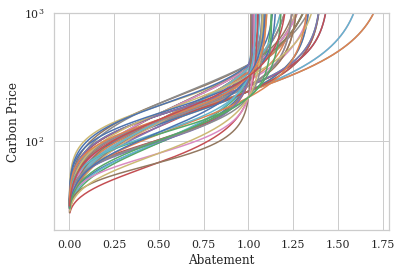

In [15]:
SCC_25 = np.arange(25, 1000)
consumption_growth = consumption_growth_array[0]

for i in range(len(param_values_3)):  # 20
    SCC = np.arange(SCC_0_array[0][i], 1000)
    P0 = SCC_25[0]
    P_50 = param_values_3[i][0]*param_values_3[i][2]
    P_100 = param_values_3[i][2]
    consumption_discount = consumption_growth + 0.015
    r = consumption_discount
#     constraint = param_values_3[i][1]
#     s = r * np.log(constraint)/np.log((P_100)/(P_50))
    s = r * param_values_3[i][1]
#     if constraint >2.5:
#     print(constraint)
    plt.plot(abatement(SCC, P0=P0, P_100=P_100, P_50=P_50, r=r, s=s), SCC)

plt.xlabel("Abatement")
plt.ylabel("Carbon Price")
plt.yscale("log")
# plt.legend(title="P0 ($)")
plt.ylim(20, 1000)

## More Points for Sobol Analysis

In [30]:
# Define the model inputs
problem_3 = {
'num_vars': 3,
'names': ['P_50/P_100', 's/r', 'P_100'],
'bounds': [[0.49, 0.51],
[1.5, 5],
[200, 210]]
}  # [0.3, 0.6], [1.5, 3], [200, 400]]
# Generate samples
param_values_3 = saltelli.sample(problem_3, 64)

In [31]:
consumption_growth_array[2]

0.02

In [32]:
test_Y, test_SCC = vary_consumption_growth3(consumption_growth_array[2])

0
17:39:36


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:233: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


8
17:40:07
16
17:40:37
24
17:41:07
32
17:41:38
40
17:42:11
48
17:42:42
56
17:43:15
64
17:43:46
72
17:44:17
80
17:44:50
88
17:45:22
96
17:45:53
104
17:46:24
112
17:46:53
120
17:47:24
128
17:47:54
136
17:48:24
144
17:48:54
152
17:49:24
160
17:49:54
168
17:50:24
176
17:50:55
184
17:51:26
192
17:51:56
200
17:52:26
208
17:52:56
216
17:53:26
224
17:53:57
232
17:54:33
240
17:55:08
248
17:55:39
256
17:56:10
264
17:56:42
272
17:57:13
280
17:57:44
288
17:58:16
296
17:58:50
304
17:59:22
312
17:59:56
320
18:00:32
328
18:01:03
336
18:01:33
344
18:02:05
352
18:02:39
360
18:03:11
368
18:03:46
376
18:04:21
384
18:04:54
392
18:05:26
400
18:06:01
408
18:06:36
416
18:07:10
424
18:07:43
432
18:08:16
440
18:08:48
448
18:09:21
456
18:09:52
464
18:10:25
472
18:10:57
480
18:11:31
488
18:12:04
496
18:12:37
504
18:13:10


In [33]:
Si = sobol.analyze(problem_3, test_Y, print_to_console=True)

                  ST   ST_conf
P_50/P_100  0.225272  0.078813
s/r         0.361272  0.107564
P_100       0.410193  0.126204
                  S1   S1_conf
P_50/P_100  0.244709  0.170263
s/r         0.356225  0.228099
P_100       0.412386  0.178472
                           S2   S2_conf
(P_50/P_100, s/r)   -0.029005  0.274131
(P_50/P_100, P_100) -0.023678  0.268107
(s/r, P_100)         0.006611  0.405304


In [34]:
total_Si, first_Si, second_Si = Si.to_df()

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

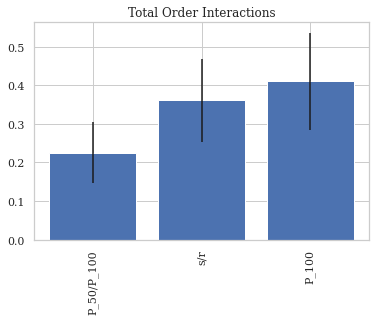

In [35]:
plt.title("Total Order Interactions")
plt.bar(total_Si.index, total_Si['ST'], yerr=total_Si['ST_conf'])
plt.xticks(rotation=90)

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

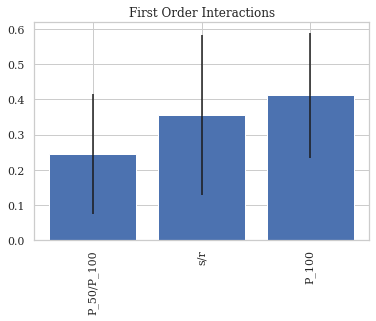

In [36]:
plt.title("First Order Interactions")
plt.bar(first_Si.index, first_Si['S1'], yerr=first_Si['S1_conf'])
plt.xticks(rotation=90)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

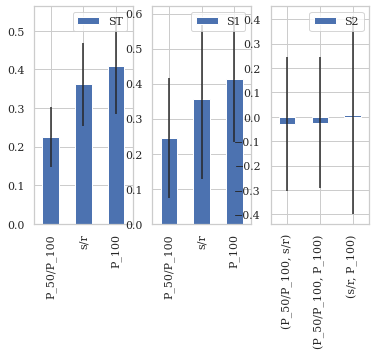

In [37]:
Si.plot()

# More Sobol

In [55]:
# Define the model inputs
problem_3 = {
'num_vars': 3,
'names': ['P_50/P_100', 's/r', 'P_100'],
'bounds': [[0.3, 0.6], 
[1.5, 3], 
[200, 400]]
}
# Generate samples
param_values_3 = saltelli.sample(problem_3, 128)

for i in range(len(consumption_growth_array)):
    consumption_growth_array[i]

    test_Y, test_SCC = vary_consumption_growth3(consumption_growth_array[i])

    Si = sobol.analyze(problem_3, test_Y, print_to_console=True)

    total_Si, first_Si, second_Si = Si.to_df()
    title = "sobol/" + str(consumption_growth_array[i])
    np.savetxt(title, test_Y, delimiter=",")

0
09:01:23


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:233: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


8
09:02:26
16
09:03:36
24
09:04:36
32
09:05:42
40
09:06:48
48
09:07:51
56
09:09:02
64
09:10:29
72
09:11:41
80
09:12:50
88
09:14:08
96
09:16:04
104
09:17:57
112
09:19:39
120
09:21:20
128
09:23:07
136
09:24:08
144
09:25:13
152
09:26:14
160
09:27:14
168
09:28:16
176
09:29:22
184
09:30:25
192
09:31:19
200
09:32:22
208
09:33:23
216
09:34:26
224
09:35:24
232
09:36:20
240
09:37:25
248
09:38:25
256
09:39:27
264
09:40:35
272
09:41:37
280
09:42:40
288
09:43:34
296
09:44:32
304
09:45:43
312
09:46:44
320
09:47:48
328
09:48:43
336
09:49:47
344
09:50:48
352
09:51:48
360
09:52:39
368
09:53:39
376
09:54:48
384
09:55:41
392
09:56:36
400
09:57:44
408
09:58:45
416
09:59:48
424
10:00:46
432
10:01:39
440
10:02:41
448
10:03:53
456
10:04:49
464
10:05:56
472
10:06:57
480
10:08:03
488
10:09:09
496
10:10:15
504
10:11:06
512
10:12:03
520
10:13:02
528
10:13:52
536
10:14:52
544
10:15:42
552
10:16:43
560
10:17:46
568
10:18:38
576
10:19:43
584
10:20:43
592
10:21:50
600
10:22:48
608
10:23:55
616
10:24:59
624
10:25:56

/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:233: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


8
11:30:38
16
11:31:14
24
11:31:49
32
11:32:21
40
11:32:55
48
11:33:31
56
11:34:01
64
11:34:48
72
11:35:18
80
11:35:48
88
11:36:32
96
11:37:03
104
11:37:39
112
11:38:20
120
11:38:54
128
11:39:32
136
11:40:15
144
11:40:50
152
11:41:18
160
11:41:58
168
11:42:29
176
11:43:04
184
11:43:37
192
11:44:17
200
11:44:57
208
11:45:29
216
11:46:02
224
11:46:47
232
11:47:31
240
11:48:03
248
11:48:39
256
11:49:15
264
11:49:53
272
11:50:26
280
11:50:57
288
11:51:39
296
11:52:16
304
11:52:55
312
11:53:32
320
11:54:12
328
11:54:52
336
11:55:26
344
11:55:56
352
11:56:35
360
11:57:16
368
11:57:51
376
11:58:25
384
11:59:02
392
11:59:46
400
12:00:22
408
12:00:54
416
12:01:31
424
12:02:04
432
12:02:37
440
12:03:07
448
12:03:39
456
12:04:18
464
12:04:52
472
12:05:31
480
12:06:03
488
12:06:37
496
12:07:15
504
12:07:48
512
12:08:34
520
12:09:13
528
12:09:54
536
12:10:30
544
12:11:11
552
12:11:53
560
12:12:27
568
12:13:06
576
12:13:43
584
12:14:17
592
12:15:00
600
12:15:31
608
12:15:59
616
12:16:28
624
12:16:55

/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:233: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


8
12:47:53
16
12:48:23
24
12:48:55
32
12:49:24
40
12:49:51
48
12:50:24
56
12:50:53
64
12:51:29
72
12:52:03
80
12:52:32
88
12:53:01
96
12:53:32
104
12:54:03
112
12:54:34
120
12:55:04
128
12:55:37
136
12:56:09
144
12:56:39
152
12:57:06
160
12:57:37
168
12:58:07
176
12:58:29
184
12:59:00
192
12:59:38
200
13:00:12
208
13:00:42
216
13:01:07
224
13:01:41
232
13:02:16
240
13:02:42
248
13:03:14
256
13:03:47
264
13:04:20
272
13:04:51
280
13:05:19
288
13:05:55
296
13:06:25
304
13:06:51
312
13:07:23
320
13:07:56
328
13:08:30
336
13:09:00
344
13:09:28
352
13:10:02
360
13:10:34
368
13:11:03
376
13:11:32
384
13:12:05
392
13:12:41
400
13:13:16
408
13:13:48
416
13:14:17
424
13:14:45
432
13:15:14
440
13:15:42
448
13:16:15
456
13:16:45
464
13:17:12
472
13:17:47
480
13:18:17
488
13:18:47
496
13:19:23
504
13:19:56
512
13:20:32
520
13:21:00
528
13:21:31
536
13:21:58
544
13:22:35
552
13:23:08
560
13:23:36
568
13:24:07
576
13:24:35
584
13:25:09
592
13:25:43
600
13:26:13
608
13:26:43
616
13:27:15
624
13:27:43

/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:233: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


8
13:54:34
16
13:55:02
24
13:55:28
32
13:55:55
40
13:56:22
48
13:56:49
56
13:57:18
64
13:57:46
72
13:58:17
80
13:58:41
88
13:59:08
96
13:59:36
104
14:00:03
112
14:00:31
120
14:00:57
128
14:01:24
136
14:01:50
144
14:02:16
152
14:02:39
160
14:03:09
168
14:03:35
176
14:03:58
184
14:04:25
192
14:04:52
200
14:05:17
208
14:05:42
216
14:06:06
224
14:06:34
232
14:07:02
240
14:07:25
248
14:07:50
256
14:08:16
264
14:08:43
272
14:09:10
280
14:09:33
288
14:10:03
296
14:10:32
304
14:11:04
312
14:11:32
320
14:12:00
328
14:12:28
336
14:12:56
344
14:13:20
352
14:13:47
360
14:14:17
368
14:14:46
376
14:15:12
384
14:15:42
392
14:16:10
400
14:16:37
408
14:17:04
416
14:17:29
424
14:17:55
432
14:18:19
440
14:18:44
448
14:19:12
456
14:19:40
464
14:20:06
472
14:20:32
480
14:21:00
488
14:21:26
496
14:21:55
504
14:22:23
512
14:22:52
520
14:23:20
528
14:23:47
536
14:24:13
544
14:24:40
552
14:25:09
560
14:25:36
568
14:26:02
576
14:26:30
584
14:26:57
592
14:27:23
600
14:27:49
608
14:28:16
616
14:28:43
624
14:29:06

/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:233: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


8
14:50:42
16
14:51:02
24
14:51:23
32
14:51:44
40
14:52:04
48
14:52:25
56
14:52:45
64
14:53:08
72
14:53:31
80
14:53:52
88
14:54:15
96
14:54:37
104
14:54:57
112
14:55:19
120
14:55:39
128
14:56:03
136
14:56:24
144
14:56:46
152
14:57:06
160
14:57:28
168
14:57:50
176
14:58:10
184
14:58:32
192
14:58:53
200
14:59:14
208
14:59:35
216
14:59:55
224
15:00:17
232
15:00:40
240
15:01:04
248
15:01:26
256
15:01:53
264
15:02:16
272
15:02:39
280
15:02:58
288
15:03:18
296
15:03:41
304
15:04:01
312
15:04:21
320
15:04:43
328
15:05:03
336
15:05:26
344
15:05:46
352
15:06:07
360
15:06:32
368
15:06:54
376
15:07:15
384
15:07:39
392
15:08:03
400
15:08:23
408
15:08:45
416
15:09:09
424
15:09:34
432
15:09:57
440
15:10:21
448
15:10:45
456
15:11:08
464
15:11:28
472
15:11:49
480
15:12:10
488
15:12:31
496
15:12:53
504
15:13:13
512
15:13:35
520
15:13:56
528
15:14:17
536
15:14:37
544
15:14:59
552
15:15:21
560
15:15:42
568
15:16:03
576
15:16:25
584
15:16:48
592
15:17:09
600
15:17:30
608
15:17:52
616
15:18:14
624
15:18:34

/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:233: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


8
15:36:43
16
15:37:01
24
15:37:18
32
15:37:36
40
15:37:54
48
15:38:12
56
15:38:31
64
15:38:51
72
15:39:09
80
15:39:26
88
15:39:45
96
15:40:02
104
15:40:20
112
15:40:38
120
15:40:56
128
15:41:18
136
15:41:39
144
15:42:00
152
15:42:17
160
15:42:35
168
15:42:53
176
15:43:12
184
15:43:30
192
15:43:50
200
15:44:08
208
15:44:28
216
15:44:45
224
15:45:04
232
15:45:24
240
15:45:42
248
15:46:00
256
15:46:19
264
15:46:39
272
15:46:57
280
15:47:14
288
15:47:33
296
15:47:52
304
15:48:09
312
15:48:28
320
15:48:46
328
15:49:04
336
15:49:24
344
15:49:42
352
15:50:02
360
15:50:22
368
15:50:40
376
15:50:58
384
15:51:16
392
15:51:37
400
15:51:55
408
15:52:13
416
15:52:31
424
15:52:49
432
15:53:07
440
15:53:23
448
15:53:41
456
15:53:59
464
15:54:16
472
15:54:35
480
15:54:52
488
15:55:10
496
15:55:28
504
15:55:45
512
15:56:05
520
15:56:24
528
15:56:43
536
15:57:01
544
15:57:20
552
15:57:38
560
15:57:56
568
15:58:14
576
15:58:33
584
15:58:51
592
15:59:10
600
15:59:27
608
15:59:44
616
16:00:03
624
16:00:20

In [42]:
total_Si

,ST,ST_conf
P_50/P_100,0.434135,0.141108
s/r,0.002580,0.001154
P_100,0.561493,0.167353


([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

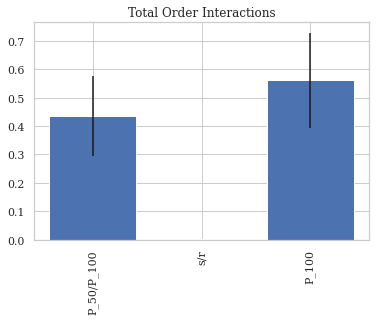

In [39]:
plt.title("Total Order Interactions")
plt.bar(total_Si.index, total_Si['ST'], yerr=total_Si['ST_conf'])
plt.xticks(rotation=90)

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

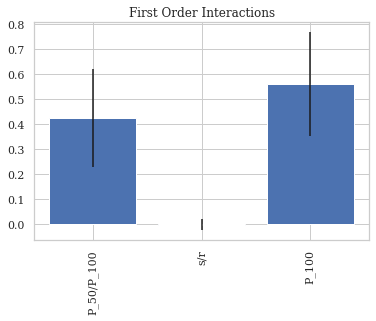

In [40]:
plt.title("First Order Interactions")
plt.bar(first_Si.index, first_Si['S1'], yerr=first_Si['S1_conf'])
plt.xticks(rotation=90)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

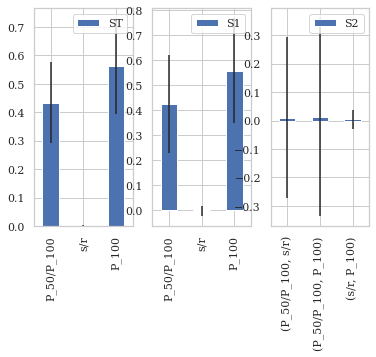

In [41]:
Si.plot()